# Step 1 and 2 : Import Libreries

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [14]:
df = pd.read_csv("/Users/dela/Documents/DataSet happiness reports/DATA/Prepared data/cleaned_2019.csv")

# Display first rows
df.head()


,overall_rank,country_or_region,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


## Drop Categorical Columns

In [16]:
# Drop categorical column
df_numeric = df.drop(columns=['country_or_region'])

# Display dataset after dropping categorical column
df_numeric.head()


,overall_rank,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298


## Standardize the Data


In [18]:
# Standardize data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Convert back to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df_numeric.columns)

# Display the scaled dataset
df_scaled.head()


,overall_rank,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,-1.720983,2.128711,1.095042,1.268098,1.080422,1.424282,-0.335404,2.996757
1,-1.698777,1.976397,1.203324,1.221154,1.121857,1.396277,0.707265,3.177158
2,-1.676571,1.934938,1.467734,1.251332,1.254446,1.473292,0.907373,2.444941
3,-1.654365,1.880862,1.195769,1.392163,1.246159,1.389276,1.781530,0.078500
4,-1.632158,1.875454,1.236060,1.050146,1.134287,1.151229,1.444506,1.988632


# Step 3: Using the Elbow Method to Determine k

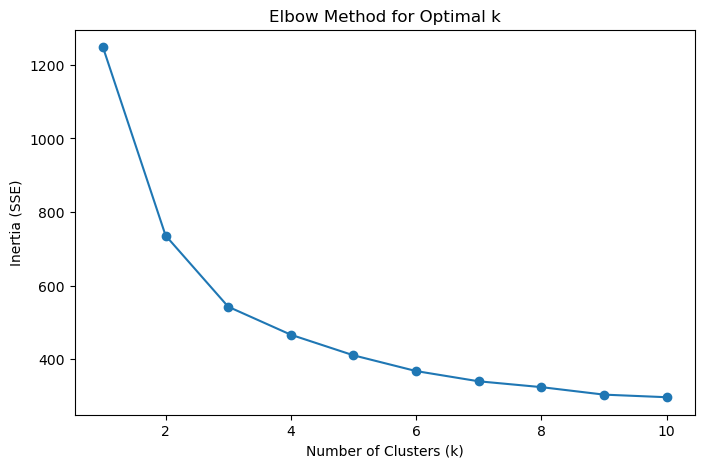

In [20]:
# Calculate inertia for different values of k
inertia = []
K_range = range(1, 11)  # Checking k values from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)  # Sum of squared distances

# Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()


### **Step 4 : Choosing k for k-Means Clustering**
- The **Elbow Method graph** shows a **sharp drop** in SSE between k=1 and k=3.
- After k=3, the rate of decrease slows significantly, indicating that additional clusters provide **diminishing returns**.
- The **"elbow" appears at k=3**, suggesting that three clusters best capture the natural groupings in our dataset.

#### **Final Decision:**
Based on this analysis, we **chose k=3** because:
- It provides a balance between simplicity and variance explanation.
- More clusters would lead to minimal improvements but increased complexity.
- The elbow clearly suggests that k=3 is optimal.

Thus, we proceed with **k=3** for clustering the dataset.


# Step 5 :

In [25]:
# Import necessary libraries
from sklearn.cluster import KMeans

# Define the optimal number of clusters (from the Elbow Method)
k_optimal = 3  

# Apply k-means clustering
kmeans = KMeans(n_clusters=k_optimal, random_state=42)

# Fit k-means and assign cluster labels
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

# Attach cluster labels back to the original (unstandardized) dataset
df['Cluster'] = df_scaled['Cluster']

# Display first few rows with assigned clusters
df.head()


,overall_rank,country_or_region,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,Cluster
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2


# Step 6: Attach Cluster Labels to the DataFrame

In [27]:
# Add the cluster labels as a new column in the original dataset
df['Cluster'] = df_scaled['Cluster']

# Display the first few rows with clusters
df.head()


,overall_rank,country_or_region,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,Cluster
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2


# Step 7 - Visualizing Clusters

## Visualization 1: GDP per Capita vs. Happiness Score

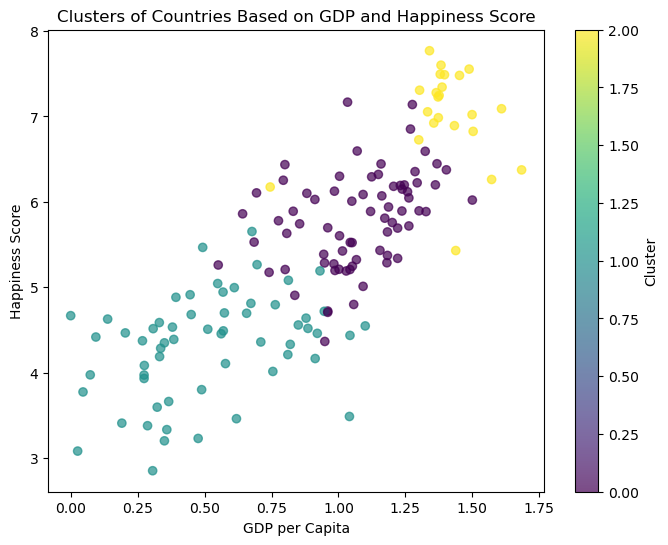

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(df['gdp_per_capita'], df['score'], c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.title('Clusters of Countries Based on GDP and Happiness Score')
plt.colorbar(label="Cluster")
plt.show()


# Visualization 2: Social Support vs. Happiness Score

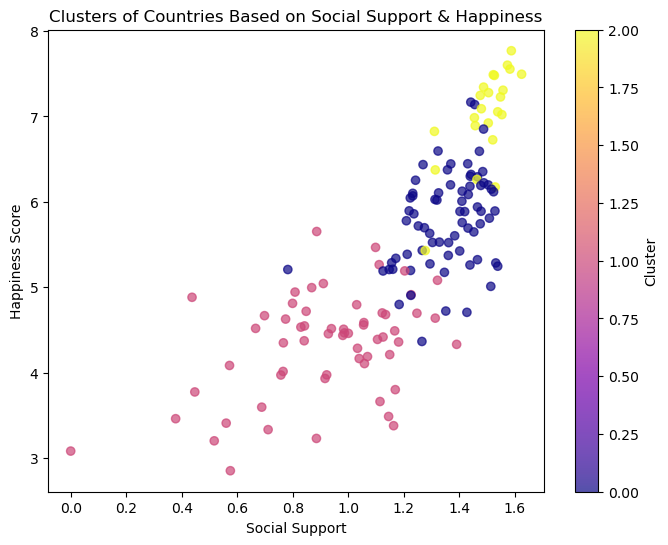

In [31]:
plt.figure(figsize=(8,6))
plt.scatter(df['social_support'], df['score'], c=df['Cluster'], cmap='plasma', alpha=0.7)
plt.xlabel('Social Support')
plt.ylabel('Happiness Score')
plt.title('Clusters of Countries Based on Social Support & Happiness')
plt.colorbar(label="Cluster")
plt.show()


# Visualization 3: Freedom to Make Life Choices vs. Happiness Score

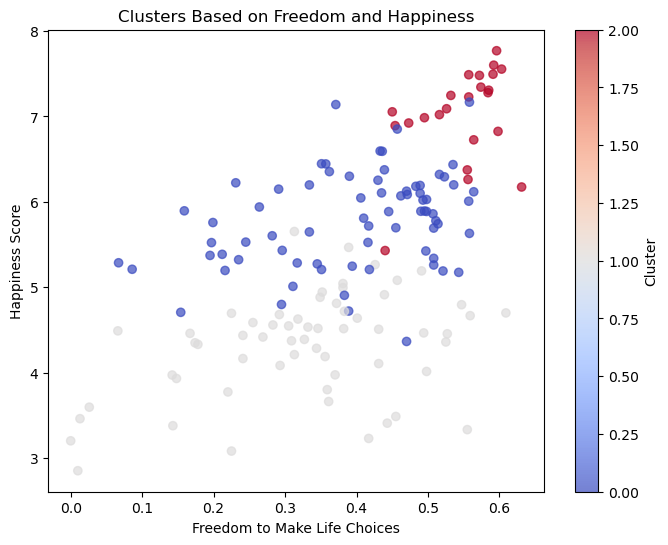

In [33]:
plt.figure(figsize=(8,6))
plt.scatter(df['freedom_to_make_life_choices'], df['score'], c=df['Cluster'], cmap='coolwarm', alpha=0.7)
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score')
plt.title('Clusters Based on Freedom and Happiness')
plt.colorbar(label="Cluster")
plt.show()


# Visualization 4: 3D Plot (GDP, Social Support, and Happiness)


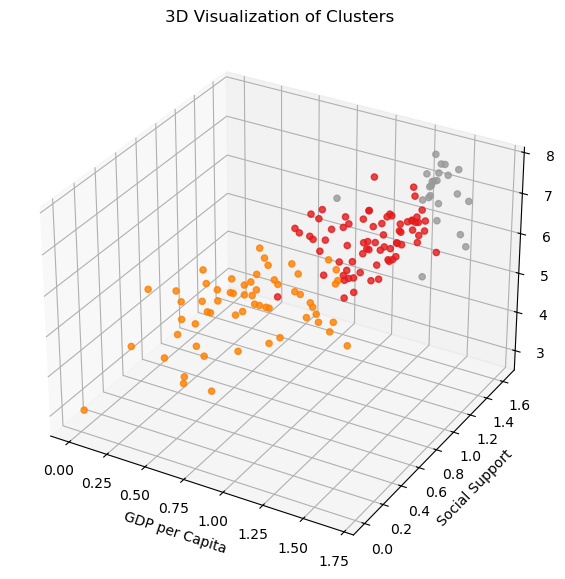

In [35]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['gdp_per_capita'], df['social_support'], df['score'], c=df['Cluster'], cmap='Set1', alpha=0.8)
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Social Support')
ax.set_zlabel('Happiness Score')
ax.set_title('3D Visualization of Clusters')

plt.show()


# Step 8:

### **Cluster Analysis & Interpretation**

I analyzed clusters based on multiple factors, including GDP per capita, social support, and freedom of choice.

#### ** Key Findings**
- **Cluster 2 (Yellow):** Wealthy nations with high GDP and strong social support have the highest happiness scores.
- **Cluster 1 (Purple/Blue):** Middle-income countries with moderate happiness.
- **Cluster 0 (Teal/Pink):** Low-income nations with lower happiness levels.

These clusters align with global economic and social trends.

#### ** Do the Clusters Make Sense?**
Yes, they show clear divisions based on economic and social well-being.

#### ** Areas for Further Analysis**
- Some middle-income countries may not fit neatly into clusters.
- Additional factors (e.g., political stability, cultural influence) could refine our understanding.

This clustering model provides **valuable insights for policymakers** aiming to improve happiness levels worldwide.


# Step 9 - Compute Cluster Statistics

In [40]:
# Select only numerical columns for analysis
numeric_columns = df.select_dtypes(include=['number']).columns

# Compute descriptive statistics per cluster (only for numerical columns)
cluster_summary = df.groupby('Cluster')[numeric_columns].mean()

# Display the cluster summary
print(cluster_summary)


         overall_rank     score  gdp_per_capita  social_support  \
Cluster                                                           
0           60.342466  5.789836        1.069342        1.354630   
1          124.216667  4.321767        0.517567        0.921733   
2           16.869565  7.023609        1.395087        1.494913   

         healthy_life_expectancy  freedom_to_make_life_choices  generosity  \
Cluster                                                                      
0                       0.839205                      0.397014    0.139521   
1                       0.484917                      0.327633    0.205483   
2                       0.990478                      0.547870    0.274870   

         perceptions_of_corruption  Cluster  
Cluster                                      
0                         0.068562      0.0  
1                         0.096367      1.0  
2                         0.281174      2.0  


### **Step 9: Cluster Descriptive Statistics - Key Insights**

#### **Cluster 2: High Happiness (Wealthy Nations)**
- Highest **happiness score (7.02)**, **GDP per capita (1.40)**, and **social support (1.49)**.
- Countries in this group likely include **Nordic nations, Switzerland, and New Zealand**.
- Higher **corruption perception (0.28)** suggests awareness rather than more corruption.

#### **Cluster 0: Mid-range Happiness (Developing Nations)**
- Moderate **happiness score (5.79)** and **GDP per capita (1.07)**.
- Represents **Eastern Europe, Latin America, and some Asian countries**.
- **Lowest corruption perception (0.07)** could mean lower awareness or different expectations.

#### **Cluster 1: Low Happiness (Struggling Nations)**
- **Lowest happiness score (4.32)**, **GDP per capita (0.52)**, and **social support (0.92)**.
- Likely includes **African, South Asian, and politically unstable nations**.
- **Corruption perception (0.10)** is slightly higher than Cluster 0.

### **Conclusion**
This clustering confirms that **GDP, social support, and life choices strongly influence happiness**. However, corruption perception is **not always tied to actual corruption levels but rather to awareness**.


### **Step 10: Future Applications of These Results**

#### **1. Policy Decision-Making**
- Governments can **analyze high-happiness countries** (Cluster 2) to develop policies that improve well-being.
- Low-happiness nations (Cluster 1) can **focus on increasing GDP per capita and social support**.

#### **2. Economic and Social Research**
- Researchers can use this dataset to **analyze the relationship between economic development and happiness**.
- Future studies can **predict how economic changes impact well-being**.

#### **3. Business & Investment Strategies**
- Companies can **target high-growth, high-happiness regions** for business expansion.
- Organizations can use these insights to **improve workplace policies**.

#### **4. Predictive Modeling for Future Trends**
- Machine learning models can **predict how GDP, social support, and freedom influence happiness**.
- Time-series forecasting can be used to **track global well-being trends**.

#### **5. Humanitarian & Development Programs**
- **NGOs and international organizations** can prioritize **economic and social aid** in struggling nations (Cluster 1).
- Funding and social programs can be optimized to **improve well-being in low-income regions**.

#### **6. Further Data Analysis**
- Adding **more features (education, healthcare access, political stability)** can refine clustering.
- Exploring **alternative clustering methods (hierarchical clustering, DBSCAN)**.
- **Trend analysis over time** to understand long-term happiness changes.

### **Conclusion**
These clusters provide valuable insights into **global happiness trends**, helping policymakers, researchers, businesses, and NGOs **make data-driven decisions** to improve well-being worldwide.
